<a href="https://colab.research.google.com/github/mosomo82/COMP_SCI_5530/blob/main/Project_Customer_Churn/src/Project_GenerateSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import requests


# ---1. CONFIGURATION ---

# Github URL for your .csv file
DATE_URL = "https://raw.githubusercontent.com/mosomo82/COMP_SCI_5530/refs/heads/main/Project_Customer_Churn/clean_data/clean_data_text_generation.csv"

#Output file name
OUTPUT_FILE = "customer_summaries.csv"

# ---2. SUMMARY CREATION FUNCTION

def generate_customer_summary(row):

    # --- Customer Profile ---
    profile = f"Customer"
    if row['gender'] == 0:
        profile += " is a female"
    else:
        profile += " is a male"
    if row['SeniorCitizen'] == 1:
        profile += "as a senior citizen"
    if row['Partner'] == 1:
        profile += " with a partner"
    if row['Dependents'] == 1:
        profile += " with dependents."
    else:
        profile += " with no dependents."

    # --- Customer Journey (Services, Payment, Contract & Tenure) ---
    journey = f" The customer has been with the company for {row['tenure']} months."

    # Contract
    if row['Contract_Encoded'] == 0:
        journey += " They are on a month-to-month contract,"
    elif row['Contract_Encoded'] == 1:
        journey += " They are on a one-year contract,"
    else:
        journey += " They are on a two-year contract,"

    # Payment
    if row['AutomaticPayment'] == 0:
        journey += f" paying via {row['PaymentMethod']}."
    else:
        journey += f" paying via {row['PaymentMethod']} (automatic)."

    journey += f" Their monthly charge is ${row['MonthlyCharges']:.2f}."

    # Services
    services = []
    if row['InternetService'] != 'No':
        services.append(f"{row['InternetService']} internet")
        if row['OnlineSecurity'] == 'Yes':
            services.append("Online Security")
        if row['OnlineBackup'] == 'Yes':
            services.append("Online Backup")
        if row['DeviceProtection'] == 'Yes':
            services.append("Device Protection")
        if row['TechSupport'] == 'Yes':
            services.append("Tech Support")
        if row['StreamingTV'] == 'Yes':
            services.append("Streaming TV")
        if row['StreamingMovies'] == 'Yes':
            services.append("Streaming Movies")
    if row['PhoneService'] == 1:
        if row['MultipleLines'] == 'Yes':
            services.append("Multiple Phone Lines")
        else:
            services.append("Phone Service")

    if services:
        journey += " Services include: " + ", ".join(services) + "."
    else:
        journey += " The customer has no active phone or internet services listed."

    # --- Risk Assessment ---
    risk_factors = []

    # Churn Status (Primary Outcome)
    if row['Churn'] == 1:
        status = "STATUS: CHURNED."
    else:
        status = "STATUS: ACTIVE."

    # Key Risk Factors
    if row['Contract_Encoded'] == 0:
        risk_factors.append("Month-to-month contract (high risk)")
    if row['tenure'] <= 12:
        risk_factors.append("New customer (<= 12 months)")
    if row['InternetService'] == 'Fiber optic':
        risk_factors.append("Fiber optic service (higher churn propensity)")
    if row['OnlineSecurity'] == 'No' and row['InternetService'] != 'No':
        risk_factors.append("No Online Security")
    if row['TechSupport'] == 'No' and row['InternetService'] != 'No':
        risk_factors.append("No Tech Support")
    if row['TotalCharges'] < 1000:
        risk_factors.append("high change of churning")
    if row['AutomaticPayment'] == 0:
        risk_factors.append("Manual payment (non-automatic)")

    if not risk_factors:
        risk = " Risk Assessment: Low risk profile."
    else:
        risk = " Risk Assessment: " + "; ".join(risk_factors) + "."

    # --- Combine and Return ---
    summary = f"{status}\n"
    summary += f"{profile}\n"
    summary += f"-----------------------------------\n"
    summary += f"{journey}\n"
    summary += f"-----------------------------------\n"
    summary += f"{risk}\n"
    summary += f"Total Charges: ${row['TotalCharges']:.2f}\n"

    return summary

# ---3. LOAD AND SAVE TO FILE---

print(f"Loading dat from {DATE_URL}")
try:
    response = requests.get(DATE_URL)
    response.raise_for_status()
    df = pd.read_csv(io.StringIO(response.text))
    print(f"Successuflly loaded {len(df)}total customers.")
except Exception as e:
    print(f"Error: Failed to fetch data from Github. {e}")
    exit()

## Apply the function to every row in the DataFrame
df['CustomerSummary'] = df.apply(generate_customer_summary, axis=1)

# Save the DataFrame with summaries to a new CSV
print(f"Saving summaries to {OUTPUT_FILE} by adding extra column as CustomerSummary with {len(df)} entries.")
df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8')

Loading dat from https://raw.githubusercontent.com/mosomo82/COMP_SCI_5530/refs/heads/main/Project_Customer_Churn/clean_data/clean_data_text_generation.csv
Successuflly loaded 7032total customers.
Saving summaries to customer_summaries.csv by adding extra column as CustomerSummary with 7032 entries.


Text(0, 0.5, 'Churn Rate')

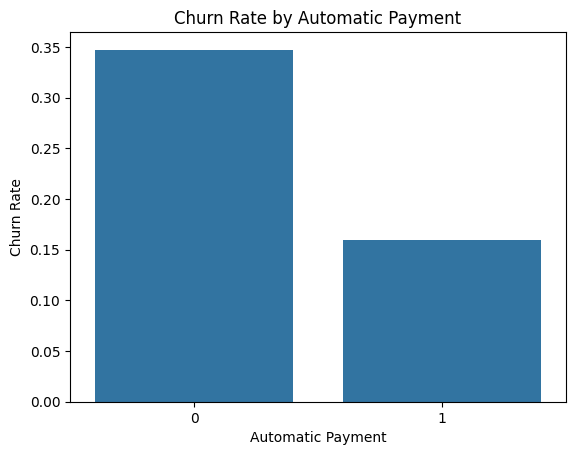

In [52]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

# print(df.shape)

# # Customer Journey Assessment

# # Customer tenure
# print(df['tenure'].mean())

# # The majority of customers are on a monthly basis
# df['Contract_Encoded'].value_counts().plot.bar()
# plt.title('Distribution of Contract Types')
# plt.xlabel('Contract Type')
# plt.ylabel('Count')
# plt.show()

# # Internet service distribution
# df['InternetService'].value_counts().plot.bar()
# plt.title('Distribution of Internet Service Types')
# plt.xlabel('Internet Service Type')
# plt.ylabel('Count')
# plt.show()

# #Payment method distribution
# df['PaymentMethod'].value_counts().plot.bar()
# plt.title('Distribution of Payment Methods')
# plt.xlabel('Payment Method')
# plt.ylabel('Count')
# plt.show()

# df['AutomaticPayment'].value_counts().plot.bar()
# plt.title('Distribution of Automatic Payments')
# plt.xlabel('Automatic Payment')
# plt.ylabel('Count')
# plt.show()

# # Average monthly charge
# print(round(df['MonthlyCharges'].mean(),2))

# #A relationship between  contract type and churn rate
# data = df.pivot_table(index='Contract_Encoded', values='Churn', aggfunc='mean')
# sns.barplot(x = data.index, y=data ['Churn'])
# plt.title('Churn Rate by Contract Type')
# plt.xlabel('Contract Type in Year(s)')
# plt.ylabel('Churn Rate')
# plt.show()

# # A reltionship between new customer and churn rate
# df['Tenure_Group'] = df['tenure'].apply(lambda x: 'New' if x <= 12 else 'Established')

# data= df.pivot_table(index='Tenure_Group', values='Churn', aggfunc='mean')
# sns.barplot(x=data.index, y=data['Churn'])
# plt.title('Churn Rate by Tenure')
# plt.xlabel('Tenure in Months')
# plt.ylabel('Churn Rate')

# # A relationship between service type and churn rate

# data = df.pivot_table(index='InternetService', values='Churn', aggfunc='mean')
# sns.barplot(x=data.index, y=data['Churn'])
# plt.title('Churn Rate by Internet Service')
# plt.xlabel('Internet Service Type')
# plt.ylabel('Churn Rate')

# A relationship between key support services (TechSupport and OnlineSecurity) and churn rate
internet_users_df = df[df['InternetService'] != 'No'].copy()
data_support_churn = internet_users_df.pivot_table(index=['TechSupport','OnlineSecurity'], values='Churn', aggfunc='mean').reset_index()
fig = px.bar(data_support_churn, x = 'TechSupport', y = 'Churn', color = 'OnlineSecurity', barmode = 'group')
fig.update_layout(title = 'Churn Rate by Key Support Services', xaxis_title = 'TechSupport', yaxis_title = 'Churn Rate')
fig.show()

# A relationship between payment methods(automatic/manual) and churn rate
data = df.pivot_table(index='AutomaticPayment', values='Churn', aggfunc='mean')
sns.barplot(x=data.index, y=data['Churn'])
plt.title('Churn Rate by Automatic Payment')
plt.xlabel('Automatic Payment')
plt.ylabel('Churn Rate')
